In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import os


In [4]:
print(os.getcwd())

C:\Users\skylo\Project_1\Folder Code


In [5]:
candy_data_to_load = Path("C:/Users/skylo/Project_1/Resources/Candy_Sales.csv")
candy_data = pd.read_csv(candy_data_to_load)


In [6]:
# Clean Data
candy_data.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.5,2,4.9,2.6
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.2,2,5.0,2.2


In [7]:
candy_data_clean = candy_data[["Order Date", "Country/Region", "State/Province", "Division", "Product Name", "Units", "Gross Profit"]]
candy_data_clean.head(2)

,Order Date,Country/Region,State/Province,Division,Product Name,Units,Gross Profit
0,2021-03-31,United States,California,Chocolate,Wonka Bar - Triple Dazzle Caramel,2,4.9
1,2021-03-31,United States,California,Chocolate,Wonka Bar -Scrumdiddlyumptious,2,5.0


In [8]:
candy_data_clean = candy_data_clean.copy()
candy_data_clean["Total Gross Profits"] = candy_data_clean["Units"] * candy_data_clean["Gross Profit"] * 1000
candy_data_clean.head(2)

,Order Date,Country/Region,State/Province,Division,Product Name,Units,Gross Profit,Total Gross Profits
0,2021-03-31,United States,California,Chocolate,Wonka Bar - Triple Dazzle Caramel,2,4.9,9800.0
1,2021-03-31,United States,California,Chocolate,Wonka Bar -Scrumdiddlyumptious,2,5.0,10000.0


In [9]:
candy_data_division = candy_data_clean.set_index("Order Date")[["State/Province", "Division", "Total Gross Profits"]]
candy_data_division.head(2)

,State/Province,Division,Total Gross Profits
Order Date,,,
2021-03-31,California,Chocolate,9800.0
2021-03-31,California,Chocolate,10000.0


In [35]:
per_state_candy_division = candy_data_division.groupby(["State/Province", "Division"])["Total Gross Profits"].sum().reset_index()
per_state_candy_division.head(3)

,State/Province,Division,Total Gross Profits
0,Alabama,Chocolate,3103180.0
1,Alabama,Other,347850.0
2,Alberta,Chocolate,1188540.0


In [41]:
state_to_region = {
    "Connecticut": "Northeast", "Maine": "Northeast", "Massachusetts": "Northeast",
    "New Hampshire": "Northeast", "Rhode Island": "Northeast", "Vermont": "Northeast",
    "New Jersey": "Mid Atlantic", "New York": "Northeast", "Pennsylvania": "Mid Atlantic",
    "Illinois": "Midwest", "Indiana": "Midwest", "Michigan": "Midwest",
    "Ohio": "Midwest", "Wisconsin": "Midwest", "Iowa": "Midwest",
    "Kansas": "Midwest", "Minnesota": "Midwest", "Missouri": "Midwest",
    "Nebraska": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",
    "Delaware": "Mid Atlantic", "Florida": "South", "Georgia": "South",
    "Maryland": "Mid Atlantic", "North Carolina": "South", "South Carolina": "South",
    "Virginia": "Mid Atlantic", "West Virginia": "South", "Alabama": "South",
    "Kentucky": "South", "Mississippi": "South", "Tennessee": "South",
    "Arkansas": "South", "Louisiana": "South", "Oklahoma": "Southwest",
    "Texas": "Southwest", "Arizona": "Southwest", "Colorado": "Pacific",
    "Idaho": "Pacific", "Montana": "Pacific", "Nevada": "Southwest",
    "New Mexico": "Southwest", "Utah": "Pacific", "Wyoming": "Pacific",
    "California": "Pacific", "Oregon": "Pacific", "Washington": "Pacific", 
    "British Columbia": "Canada", "Manitoba": "Canada", "New Brunswick": "Canada",
    "Newfoundland and Labrador": "Canada", "Nova Scotia": "Canada", "Ontario": "Canada",
    "Prince Edward Island": "Canada", "Quebec": "Canada", "Saskatchewan": "Canada", "Alberta": "Canada",
    "District of Columbia": "Mid Atlantic"
}

per_state_candy_division["Region"] = per_state_candy_division["State/Province"].map(state_to_region)

per_region_candy = per_state_candy_division.groupby(["Region", "Division"])["Total Gross Profits"].sum().reset_index()

per_region_candy

,Region,Division,Total Gross Profits
0,Canada,Chocolate,9647290.0
1,Canada,Other,540000.0
2,Mid Atlantic,Chocolate,48437170.0
3,Mid Atlantic,Other,3300700.0
4,Mid Atlantic,Sugar,79370.0
5,Midwest,Chocolate,75811900.0
6,Midwest,Other,5920600.0
7,Midwest,Sugar,96330.0
8,Northeast,Chocolate,63344790.0
9,Northeast,Other,2896100.0


In [43]:
per_region_candy_summary = per_state_candy_division.groupby("Region")["Total Gross Profits"].sum().reset_index()

per_region_candy_summary

,Region,Total Gross Profits
0,Canada,10187290.0
1,Mid Atlantic,51817240.0
2,Midwest,81828830.0
3,Northeast,66454450.0
4,Pacific,138033390.0
5,South,64171520.0
6,Southwest,64935120.0


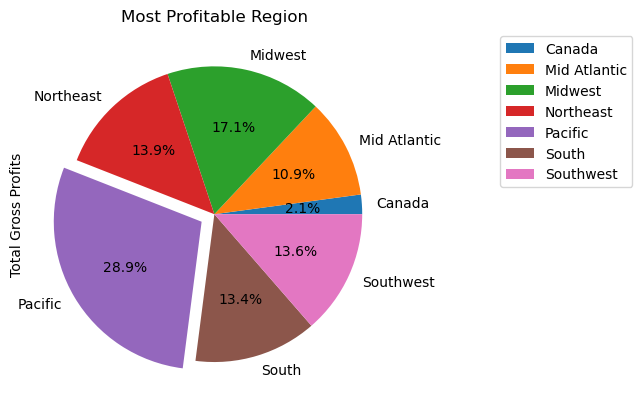

In [71]:
explode = [0, 0, 0, 0, 0.1, 0, 0]
per_region_candy_summary.plot.pie(y="Total Gross Profits", labels=per_region_candy_summary["Region"], explode=explode, autopct='%1.1f%%')
plt.title("Most Profitable Region")
plt.legend(bbox_to_anchor=(1.65, 1), loc="upper right")
plt.savefig("per_region_candy_summary.png", dpi=300, bbox_inches="tight")
plt.show()

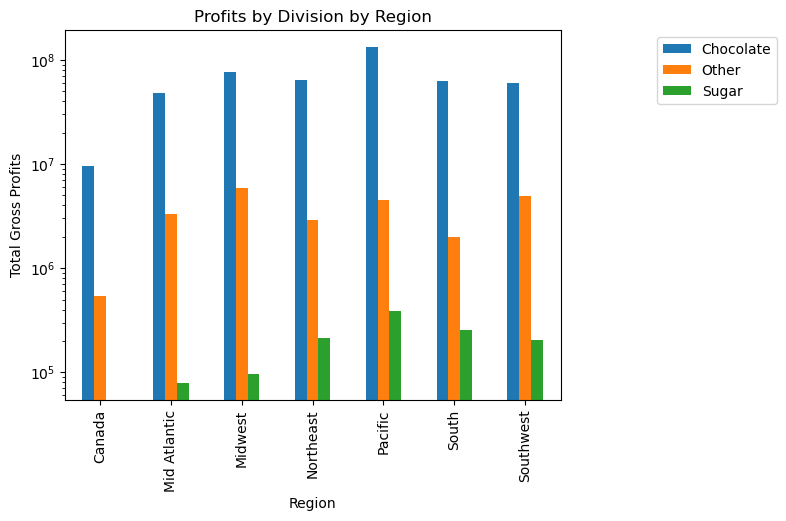

In [72]:
barwidth = 0.30
pivot_table = per_region_candy.pivot_table(index="Region", columns="Division", values="Total Gross Profits", aggfunc="sum")
ax = pivot_table.plot(kind="bar", stacked=False)
ax.set_yscale("log")
plt.xlabel("Region")
plt.ylabel("Total Gross Profits")
plt.title("Profits by Division by Region")
plt.legend(bbox_to_anchor=(1.45, 1), loc="best")
plt.savefig("pivot_table.png", dpi=300, bbox_inches="tight")
plt.show()